In [56]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

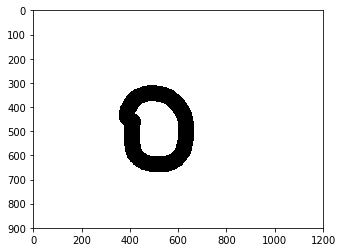

In [57]:
DATADIR = "./TrainImg/"
CATEGORIES= ["0", "1"]
for category in CATEGORIES:
    path = os.path.join(DATADIR, category) #path to 0 or 1
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        break
    break

In [58]:
print(img_array.shape)

(900, 1200)


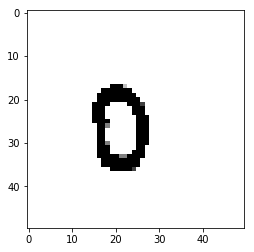

In [59]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap= 'gray')
plt.show()

In [60]:
train_data = []

def create_train_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) #path to 0 or 1
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                train_data.append([new_array,class_num])
            except Exception as e:
                pass
            
create_train_data()

In [61]:
print(len(train_data))

60


In [62]:
import random

random.shuffle(train_data)

In [63]:
for sample in train_data[:10]:
    print(sample[1])

1
0
1
1
0
1
0
1
0
1


In [64]:
X = []
y = []

In [65]:
for features, label in train_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [66]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()
pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [67]:
pickle_in= open("X.pickle", "rb")
X = pickle.load(pickle_in)
X.shape[1:]

(50, 50, 1)

In [87]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation, Flatten, Conv2D, MaxPooling2D

X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))

X = X/255.0

model = Sequential()

model.add(Conv2D(64,(3,3),input_shape= X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),input_shape= X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))


model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

model.fit(X,y,batch_size=10, epochs=10, validation_split=0.1)


Train on 54 samples, validate on 6 samples
Epoch 1/10
54/54 [==============================] - 1s 19ms/step - loss: 1.0605 - acc: 0.5370 - val_loss: 0.5087 - val_acc: 0.8333
Epoch 2/10
54/54 [==============================] - 1s 11ms/step - loss: 0.6349 - acc: 0.6667 - val_loss: 0.6015 - val_acc: 0.6667
Epoch 3/10
54/54 [==============================] - 1s 11ms/step - loss: 0.6086 - acc: 0.6852 - val_loss: 0.9202 - val_acc: 0.3333
Epoch 4/10
54/54 [==============================] - 1s 11ms/step - loss: 0.4321 - acc: 0.8519 - val_loss: 0.4934 - val_acc: 0.6667
Epoch 5/10
54/54 [==============================] - 1s 12ms/step - loss: 0.3420 - acc: 0.8889 - val_loss: 0.6684 - val_acc: 0.6667
Epoch 6/10
54/54 [==============================] - 1s 14ms/step - loss: 0.1925 - acc: 0.9444 - val_loss: 0.7986 - val_acc: 0.6667
Epoch 7/10
54/54 [==============================] - 1s 14ms/step - loss: 0.1232 - acc: 0.9815 - val_loss: 0.9093 - val_acc: 0.6667
Epoch 8/10
54/54 [======================